In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#machine learning
#for sklearn

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [8]:
trainTest = pd.concat([train,test], sort=True)

In [9]:
train.shape

(59400, 42)

In [10]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [11]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [12]:
threshold5per = len(train)*.05

In [13]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [14]:
#drop from train, test, and master
train.drop(labels = columns2Drop, inplace=True, axis =1)
test.drop(labels = columns2Drop, inplace=True, axis =1)
trainTest.drop(labels = columns2Drop, inplace=True, axis =1)

In [15]:
#drop id from train, test, and master
train.drop(labels = 'id', inplace=True, axis =1)
test.drop(labels = 'id', inplace=True, axis =1)
trainTest.drop(labels = 'id', inplace=True, axis =1)

In [16]:
train.isnull().sum()
#subvillage is now the only thing missing data

amount_tsh               0  
date_recorded            0  
gps_height               0  
longitude                0  
latitude                 0  
wpt_name                 0  
num_private              0  
basin                    0  
subvillage               371
region                   0  
region_code              0  
district_code            0  
lga                      0  
ward                     0  
population               0  
recorded_by              0  
construction_year        0  
extraction_type          0  
extraction_type_group    0  
extraction_type_class    0  
management               0  
management_group         0  
payment                  0  
payment_type             0  
water_quality            0  
quality_group            0  
quantity                 0  
quantity_group           0  
source                   0  
source_type              0  
source_class             0  
waterpoint_type          0  
waterpoint_type_group    0  
status_group             0  
dataType      

In [17]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [18]:
print(cat_col)

['date_recorded', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


In [19]:
print(train[cat_col].nunique())
print()
print(train[cat_col].nunique()>21)

#convert date_recorded into an actual date
#drop anything with more than 21 different categories
#drop recorded_by as only has 1 unique value

#needed to update my pandas on mac.  Now working.  

#LESSONS LEARNED
#if something works on one computer, and not the other, update the packates

date_recorded            356  
wpt_name                 37400
basin                    9    
subvillage               19287
region                   21   
lga                      125  
ward                     2092 
recorded_by              1    
extraction_type          18   
extraction_type_group    13   
extraction_type_class    7    
management               12   
management_group         5    
payment                  7    
payment_type             7    
water_quality            8    
quality_group            6    
quantity                 5    
quantity_group           5    
source                   10   
source_type              7    
source_class             3    
waterpoint_type          7    
waterpoint_type_group    6    
status_group             3    
dataType                 1    
dtype: int64

date_recorded            True 
wpt_name                 True 
basin                    False
subvillage               True 
region                   False
lga                      

In [20]:
columns2drop2 = ['wpt_name','subvillage','lga','ward','recorded_by']

In [21]:
#dropping additional features
train.drop(columns2drop2, inplace=True, axis =1)
test.drop(columns2drop2, inplace=True, axis =1)
trainTest.drop(columns2drop2, inplace=True, axis =1)

In [22]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [23]:
#convert string date to date time
train['date_recorded'] = pd.to_datetime(train['date_recorded'])
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
trainTest['date_recorded'] = pd.to_datetime(trainTest['date_recorded'])

In [24]:
#create columns to split out the data
train['year'] = pd.DatetimeIndex(train['date_recorded']).year
train['month'] = pd.DatetimeIndex(train['date_recorded']).month
train['day'] = pd.DatetimeIndex(train['date_recorded']).day

test['year'] = pd.DatetimeIndex(test['date_recorded']).year
test['month'] = pd.DatetimeIndex(test['date_recorded']).month
test['day'] = pd.DatetimeIndex(test['date_recorded']).day

trainTest['year'] = pd.DatetimeIndex(trainTest['date_recorded']).year
trainTest['month'] = pd.DatetimeIndex(trainTest['date_recorded']).month
trainTest['day'] = pd.DatetimeIndex(trainTest['date_recorded']).day


In [25]:
print('Unique Years: {}'.format(train.year.nunique()))
print('Unique Months: {}'.format(train.month.nunique()))
print('Unique Days: {}'.format(train.day.nunique()))

Unique Years: 5
Unique Months: 12
Unique Days: 31


2011    28674
2013    24271
2012    6424 
2004    30   
2002    1    
Name: year, dtype: int64


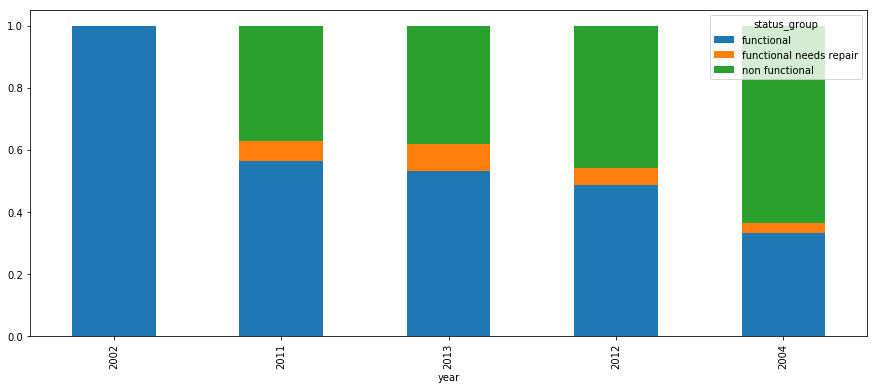

In [26]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('year').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

#how many counts did we have for 2002 and 2004?
print(train.year.value_counts())

#any data before 2011 may not be helpful.  Possible that the data is way less accurate

In [27]:
#what years does the test set have?
test.year.value_counts()

#as predicted in the train set, there aren't a ton of values pre 2011.

#pre 2011 might be a good cut off to feature engineer

2011    7234
2013    5939
2012    1665
2004    11  
2001    1   
Name: year, dtype: int64

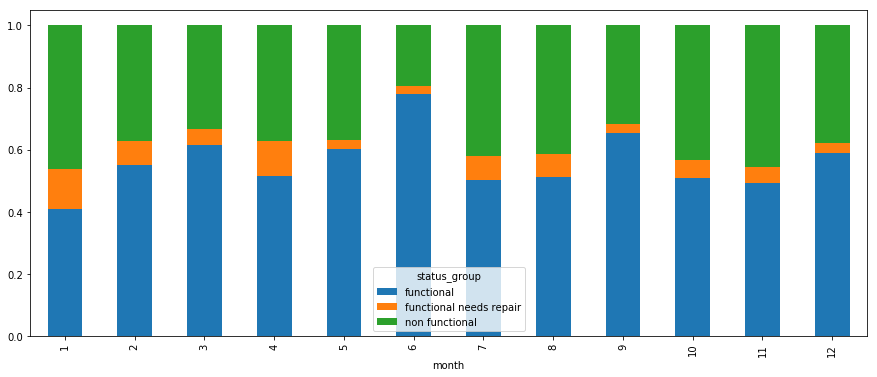

In [28]:
train.groupby('month').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#Observations

#June is by far the highest - feature engineering
#last month of the quarter is the best - feature engineering 

#hypothesis that non profits or NGOs have money they need to use at by the end of the quarter, so use it or lose it
#and spend on making wells

In [29]:
def quartermonth(x):
    if x % 3 == 0:
        return(3)
    if x % 3 == 2:
        return(2)
    if x % 3 == 1:
        return(1)        

In [30]:
train['quarterMonth'] = train['month'].apply(quartermonth)
test['quarterMonth'] = test['month'].apply(quartermonth)
trainTest['quarterMonth'] = trainTest['month'].apply(quartermonth)

In [31]:
num_col = list(train.select_dtypes(exclude = ['object']).columns)
print(num_col)

['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year', 'month', 'day', 'quarterMonth']


In [32]:
# ['amount_tsh','gps_height','longitude','latitude', 'num_private', 'region_code', 'district_code']
# ['population','construction_year', 'year', 'month', 'day', 'quarterMonth']

In [33]:
train.num_private.describe()

count    59400.000000
mean     0.474141    
std      12.236230   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      1776.000000 
Name: num_private, dtype: float64

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


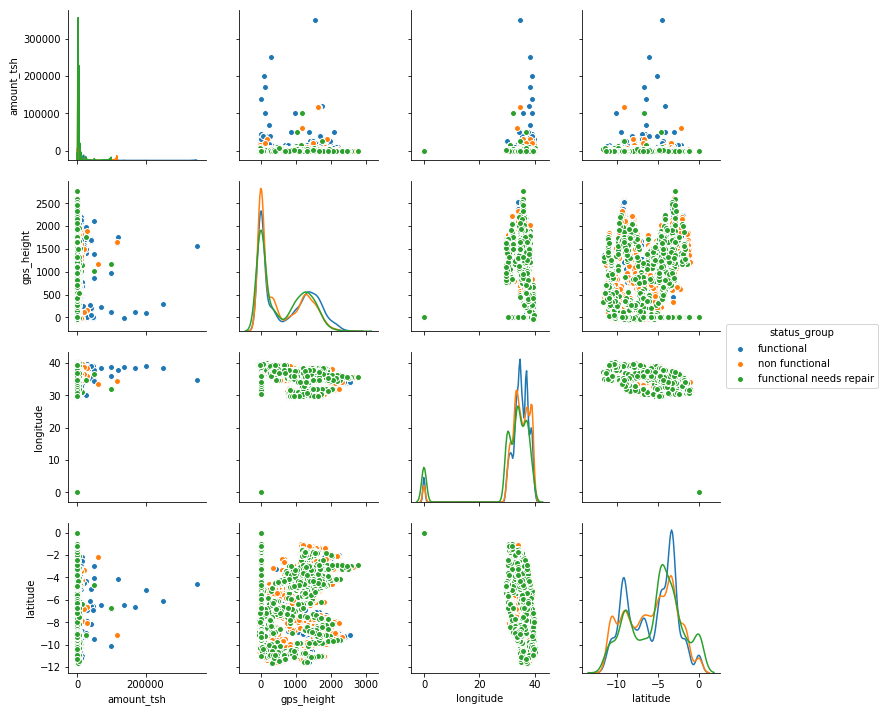

In [34]:
%matplotlib inline

sns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
#warning says not to use floats to

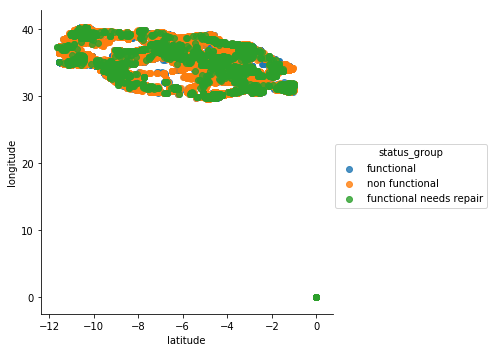

In [39]:
sns.lmplot(x = 'latitude', y = 'longitude', data = train, hue = 'status_group',fit_reg = False)
#need to get rid of the combo 0 latitude and 0 longitude

In [57]:
#explore which ones are missing values
print(train['basin'][train.latitude == -2.000000e-08].value_counts())
print()
print(train['basin'][train.longitude == 0].value_counts())

#only Lake Vic & Tang are missing values 

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64


In [62]:
#Latitude Averages
LakeVicLat = train['latitude'][(train.basin == 'Lake Victoria') & (train.latitude != -2.000000e-08)].mean()
LakeTangLat = train['latitude'][(train.basin == 'Lake Tanganyika') & (train.latitude != -2.000000e-08)].mean()

#Longitude Averages

LakeVicLong = train['longitude'][(train.basin == 'Lake Victoria') & (train.latitude != 0)].mean()
LakeTangLong = train['longitude'][(train.basin == 'Lake Tanganyika') & (train.latitude != 0)].mean()

In [63]:
print('Lake Victoria Latitude Average: {}'.format(LakeVicLat))
print('Lake Tanganyika Latitude Average: {}'.format(LakeTangLat))
print()
print('Lake Victoria Longitude Average: {}'.format(LakeVicLong))
print('Lake Tanganyika Longitude Average: {}'.format(LakeTangLong))

Lake Victoria Latitude Average: -2.2415674917059136
Lake Tanganyika Latitude Average: -4.603149814508157

Lake Victoria Longitude Average: 27.284607409417426
Lake Tanganyika Longitude Average: 30.73039219115669


In [68]:
train.latitude.replace(to_replace = -2.000000e-08,value = np.nan,inplace = True)
train.longitude.replace(to_replace = 0,value = np.nan,inplace = True)

In [70]:
#successfully replaced values with NaNs

#but now need to replace the NaNs with the above specific values

21      NaN
53      NaN
168     NaN
177     NaN
253     NaN
256     NaN
285     NaN
301     NaN
306     NaN
321     NaN
323     NaN
326     NaN
346     NaN
370     NaN
433     NaN
659     NaN
678     NaN
697     NaN
720     NaN
733     NaN
753     NaN
755     NaN
798     NaN
839     NaN
911     NaN
939     NaN
960     NaN
965     NaN
971     NaN
992     NaN
         ..
58416   NaN
58435   NaN
58446   NaN
58463   NaN
58517   NaN
58545   NaN
58550   NaN
58555   NaN
58607   NaN
58678   NaN
58735   NaN
58771   NaN
58837   NaN
58859   NaN
58969   NaN
58997   NaN
59017   NaN
59033   NaN
59111   NaN
59120   NaN
59135   NaN
59158   NaN
59162   NaN
59166   NaN
59184   NaN
59189   NaN
59208   NaN
59295   NaN
59324   NaN
59374   NaN
Name: longitude, Length: 1812, dtype: float64

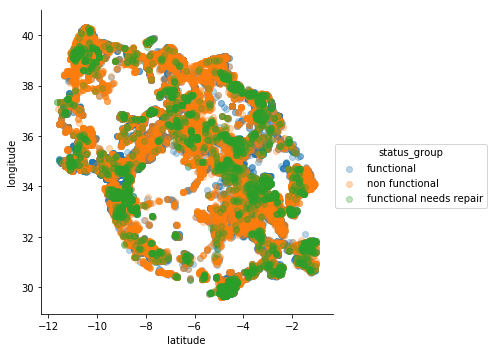

In [73]:
sns.lmplot(x = 'latitude', y = 'longitude', 
           data = train, hue = 'status_group',fit_reg = False, 
           scatter_kws={'alpha':0.3})

In [82]:
#data cleaning

#longitude with 0 

"""
Latitude is written before longitude. 
Latitude is written with a number, followed by either “north” or “south” depending on whether it 
is located north or south of the equator. 
Longitude is written with a number, followed by either “east” or “west” depending on whether it 
is located east or west of the Prime Meridian.
"""

#Lake Victoria Coordinates
#0.7558° S, 33.4384° E

#train[train.longitude < 10]
LakeVictLongAvg = train['longitude'][(train.basin == 'Lake Victoria') & (train.longitude != 0)].mean()
#train['longitude'] = train['longitude'][(train.basin == 'Lake Victoria') & (train.longitude == 0)].replace(0.0,LakeVictLongAvg,inplace = True)

#train['longitude'][(train.basin == 'Lake Victoria') & (train.longitude == 0)]
#train[(train.basin == 'Lake Victoria') & (train.longitude == 0)]

#Lake Tanganyika Coordinates
#6.2556° S, 29.5108° E

#train[['longitude','basin']][(train.basin == 'Lake Tanganyika') & (train.longitude == 0)]

In [116]:
LakeVictLongAvg

32.76070963464672

In [119]:
#t/f list of where the following conditions are true
(train.basin == 'Lake Victoria') & (train.longitude == 0)

#filtered data frame for where above conditions are true
train[(train.basin == 'Lake Victoria') & (train.longitude == 0)]

#filterd single longitude column for where conditions are true
train.longitude[(train.basin == 'Lake Victoria') & (train.longitude == 0)]

#relace all 0.0 with something else
#train.longitude[(train.basin == 'Lake Victoria') & (train.longitude == 0)].replace(
#to_replace = 0.0,
#value = LakeVictLongAvg)

train.longitude[(train.basin == 'Lake Victoria') & (train.longitude == 0)] = train.longitude[
    (train.basin == 'Lake Victoria') & (train.longitude == 0)].replace(
to_replace = 0.0,
value = LakeVictLongAvg,
inplace = True)



#how to get to work now 
train.longitude

C:\Users\jbonanno\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0        34.938093
1        34.698766
2        37.460664
3        38.486161
4        31.130847
5        39.172796
6        33.362410
7        32.620617
8        32.711100
9        30.626991
10       39.209518
11       35.770258
12       33.798106
13       37.092574
14       34.364073
15       31.444121
16       34.642439
17       34.569266
18       32.920154
19       34.508967
20       34.473430
21      NaN       
22       34.586901
23       37.940029
24       29.747066
25       37.422751
26       39.370777
27       31.104257
28       37.611126
29       37.061688
           ...    
59370    30.058731
59371    33.586406
59372    32.058548
59373    32.125024
59374   NaN       
59375    39.046942
59376    34.821039
59377    33.437012
59378    34.620387
59379    31.613284
59380    34.942101
59381    38.835001
59382    37.454759
59383    39.626009
59384    30.667805
59385    33.951681
59386    31.738789
59387    39.176480
59388    30.692400
59389    30.646486
59390    31.370848
59391    38.

In [87]:
train['longitude'][(train.basin == 'Lake Victoria') & (train.longitude == 0)]replace(0.0,LakeVictLongAvg,inplace = True)

In [88]:
train['longitude'][(train.basin == 'Lake Victoria')]

1        34.698766
4        31.130847
9        30.626991
18       32.920154
21       0.000000 
27       31.104257
53       0.000000 
54       30.983023
59       31.454282
67       30.716090
73       34.657034
75       31.796873
84       34.190575
85       32.185517
87       31.558903
94       31.453111
97       33.079504
107      31.767301
115      31.663273
117      33.356471
118      34.448645
121      31.572398
129      32.993701
139      31.647322
146      31.653268
150      34.455478
153      34.563877
158      34.089154
164      33.163581
168      0.000000 
           ...    
59229    32.677781
59230    33.186638
59238    30.903718
59244    34.421286
59248    33.058223
59249    30.734873
59258    34.499996
59262    33.898670
59269    32.933684
59271    30.608528
59284    30.533111
59289    31.736273
59291    31.549027
59295    0.000000 
59304    34.160104
59315    34.485523
59324    0.000000 
59329    32.597166
59334    33.428333
59342    30.988360
59347    33.627314
59350    33.

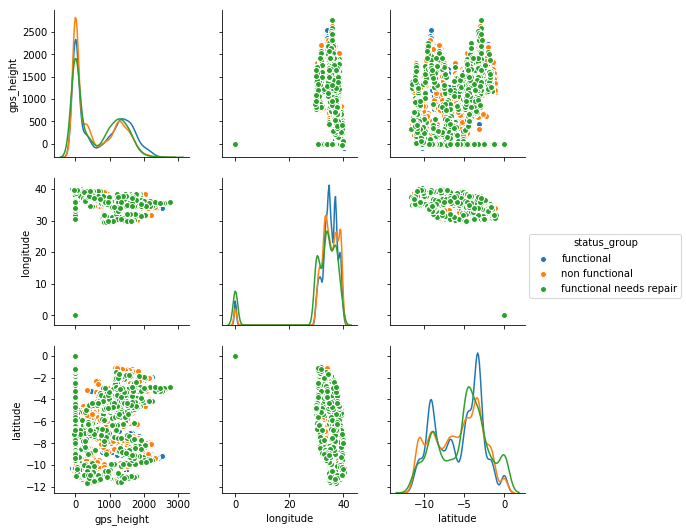

In [47]:
sns.pairplot(train[['gps_height','longitude','latitude',
                    'status_group']],
              hue = 'status_group',
             diag_kind = 'kde')

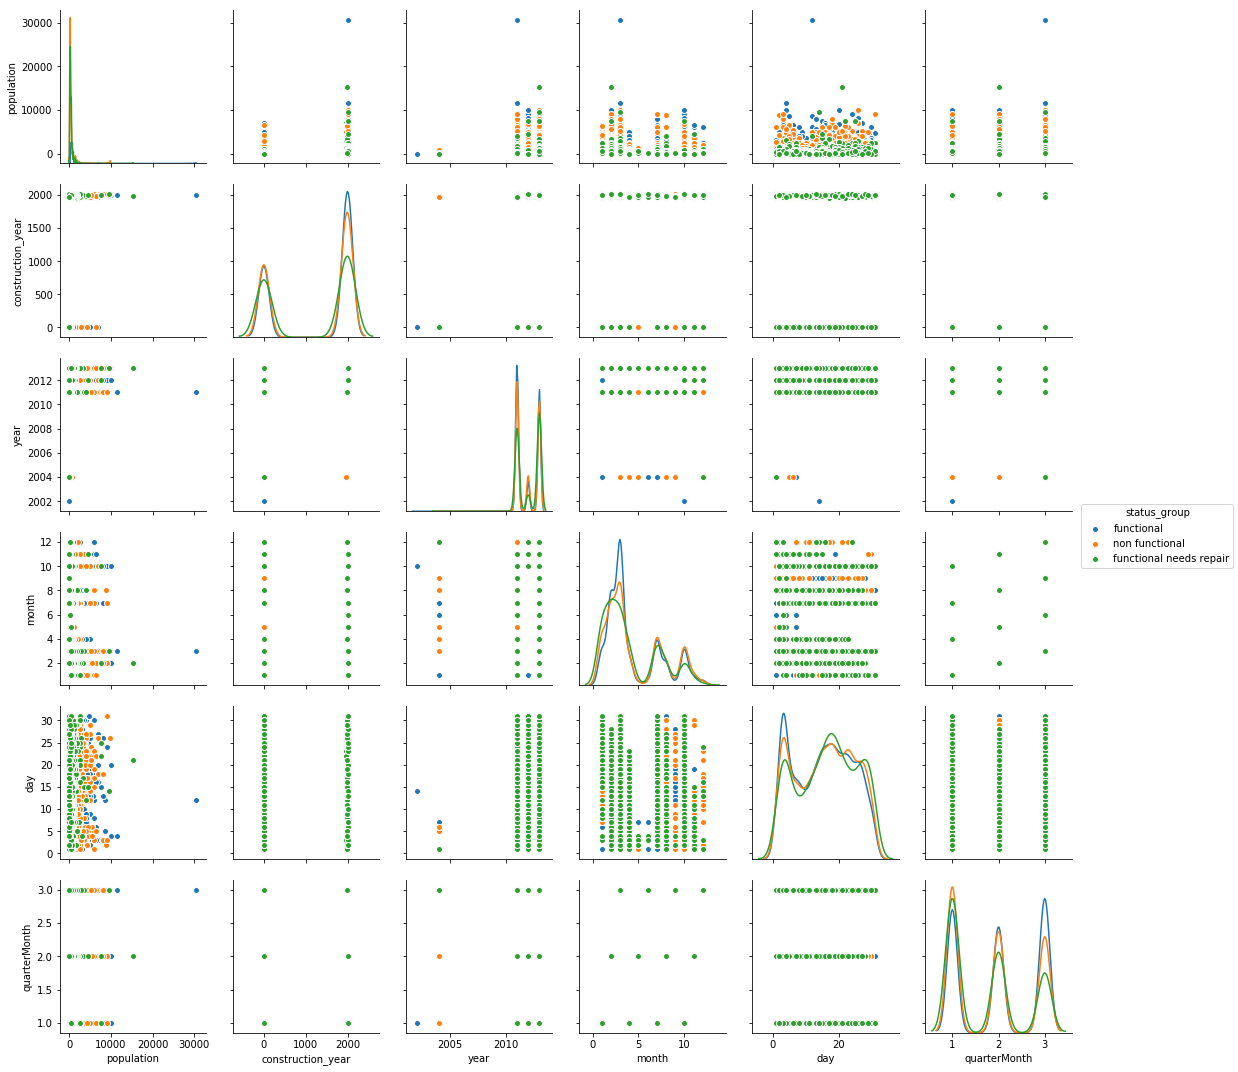

In [48]:
sns.pairplot(train[['population','construction_year', 'year', 'month', 'day', 'quarterMonth',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')

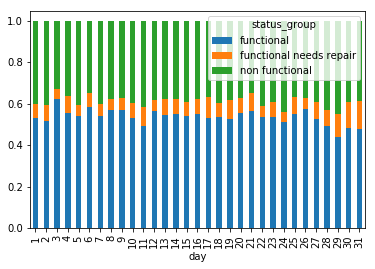

In [36]:
train.groupby('day').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#observations

In [51]:
train[cat_col].columns

Index(['date_recorded', 'basin', 'region', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'dataType'],
      dtype='object')

In [50]:
train.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Need to look at a differnet feature groups to see if they are the same or if they have any differences

extraction_type, extraction_type_group, extraction_type_group
management, management_group
payment, payment_type
water_quality, quality_group
quantity, quantity_group
source, source_type, source_group
waterpoint_type, waterpoint_group

In [ ]:
train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values('functional',ascending=False)

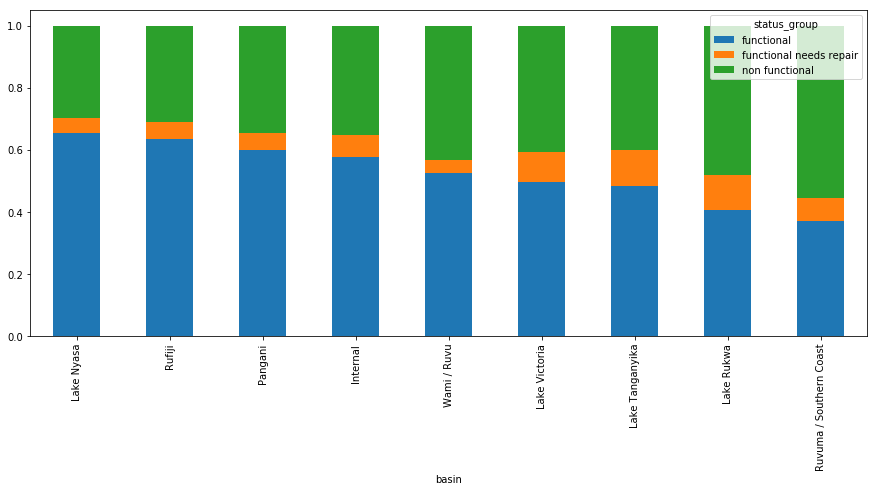

In [37]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

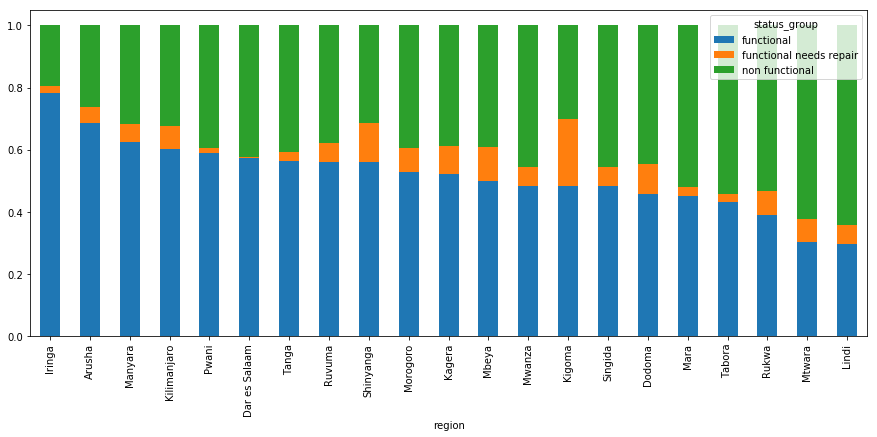

In [53]:
#region
train.groupby('region').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [113]:
train[['extraction_type','extraction_type_group','extraction_type_class']].nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class    7 
dtype: int64

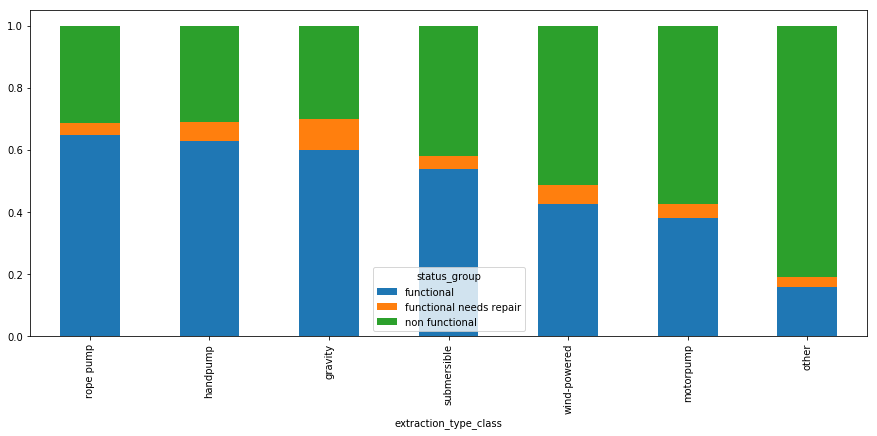

In [114]:
train.groupby('extraction_type_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [115]:
train[['management','management_group']].nunique()

management          12
management_group    5 
dtype: int64

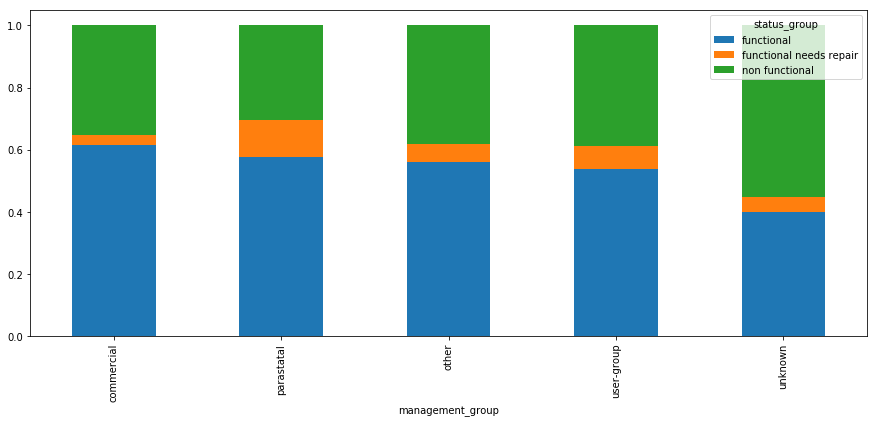

In [59]:
#managment_group
train.groupby('management_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [116]:
train[['payment','payment_type']].nunique()

payment         7
payment_type    7
dtype: int64

In [120]:
print(train.payment.value_counts())
print()
print(train.payment_type.value_counts())

never pay                25348
pay per bucket           8985 
pay monthly              8300 
unknown                  8157 
pay when scheme fails    3914 
pay annually             3642 
other                    1054 
Name: payment, dtype: int64

never pay     25348
per bucket    8985 
monthly       8300 
unknown       8157 
on failure    3914 
annually      3642 
other         1054 
Name: payment_type, dtype: int64


In [122]:
#strongly suspect that payment and payment_type are exactly the same
#and can drop one

poc = train[['payment','payment_type']].copy()

#never pay - confirmed
#pay per buckect - confirmed
#pay monthly - confirmed
#unknown - confirmed
#pay when scheme fails - confirmed
#pay annually - confirmed
#other - confirmed

poc[poc['payment']=='other']


In [131]:
#drop payment feature as exacply the same as payment_type
train.drop(labels = 'payment', inplace=True, axis =1)
test.drop(labels = 'payment', inplace=True, axis =1)
trainTest.drop(labels = 'payment', inplace=True, axis =1)

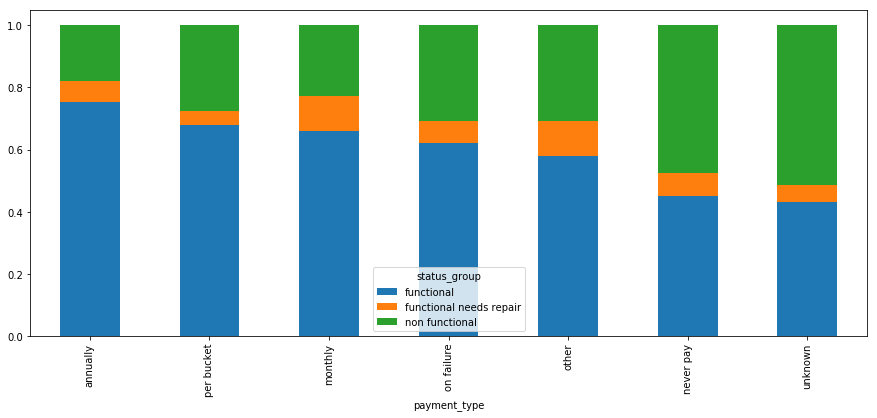

In [61]:
#payment_type
train.groupby('payment_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [132]:
train[['water_quality','quantity_group']].nunique()

water_quality     8
quantity_group    5
dtype: int64

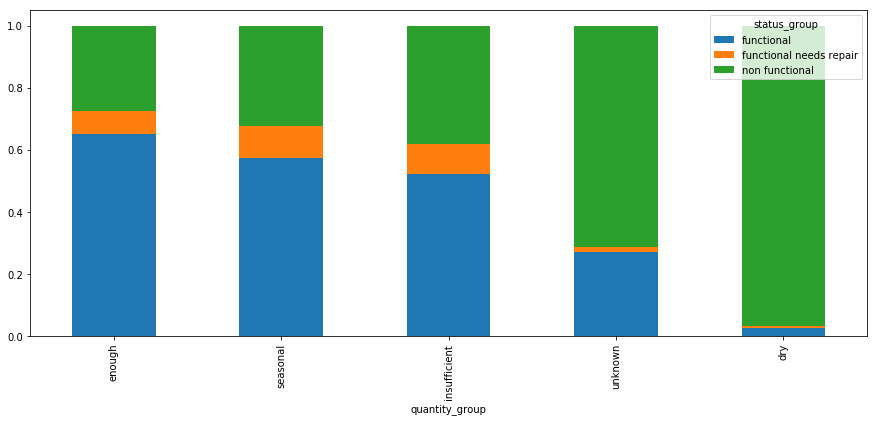

In [134]:
#quanity_group
train.groupby('quantity_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [135]:
train[['source','source_type','source_class']].nunique()

source          10
source_type     7 
source_class    3 
dtype: int64

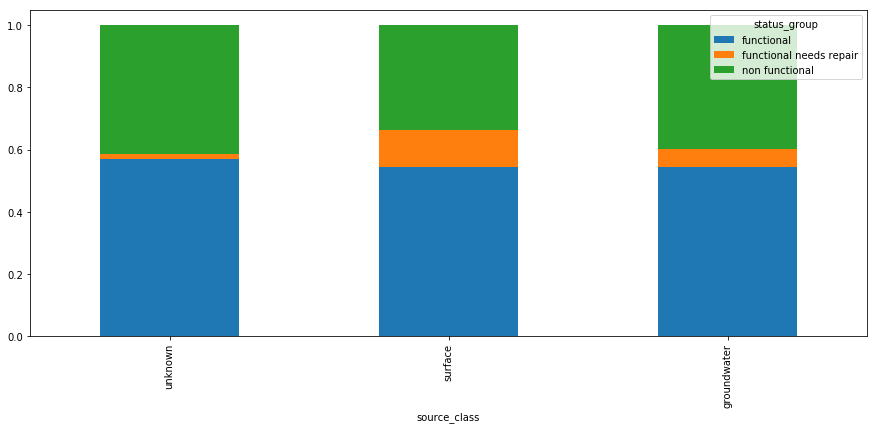

In [136]:
#source_class
train.groupby('source_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [137]:
train[['waterpoint_type','waterpoint_type_group']].nunique()

waterpoint_type          7
waterpoint_type_group    6
dtype: int64

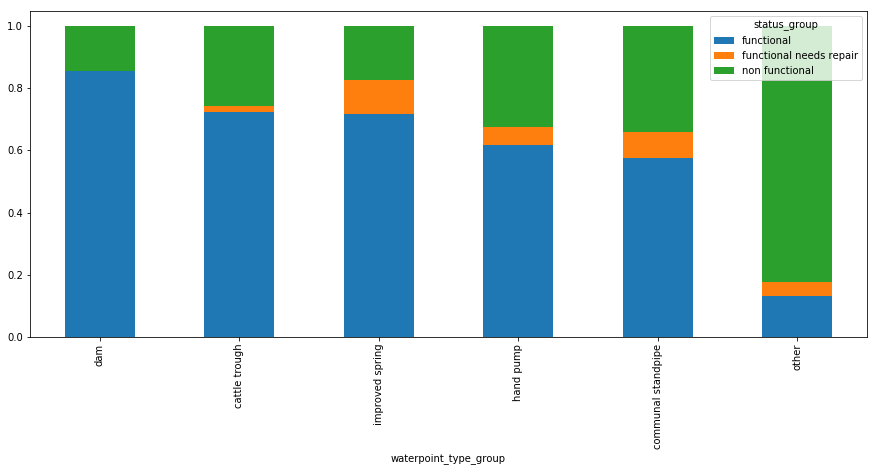

In [139]:
#water_type_group
train.groupby('waterpoint_type_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [27]:
#goal for today is to split the data into year, month, and day.  Then run EDA on it if I have time.   
train.waterpoint_type.dtypes

dtype('O')

In [28]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

In [29]:
train.date_recorded.dtypes

dtype('<M8[ns]')